<a href="https://colab.research.google.com/github/leonardo0231/Special-topics/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data from kaggle to google drive

In [16]:
!pip install kaggle --quiet

In [17]:
from google.colab import files, drive

In [18]:
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
  0% 0.00/80.9M [00:00<?, ?B/s]
100% 80.9M/80.9M [00:00<00:00, 1.21GB/s]


In [21]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


# Code of Model

## Impor library

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [23]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)

In [24]:
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
data = data[['target', 'text']]
data['target'] = data['target'].replace(4, 1)  # 1 = positive, 0 = negative


In [25]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(f"[{string.punctuation}]", '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['clean_text'] = data['text'].apply(clean_text)
data = data.sample(20000, random_state=42)

In [26]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['clean_text'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
params_dt = {'max_depth': [5, 10, 15, 20]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params_dt, cv=3)
grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.best_estimator_.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree:")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)
print("Confusion Matrix:\n", cm_dt)
print("Best Params:", grid_dt.best_params_)

Decision Tree:
Accuracy: 0.597
Precision: 0.5610350076103501
Recall: 0.9155489319423745
Confusion Matrix:
 [[ 545 1442]
 [ 170 1843]]
Best Params: {'max_depth': 20}


In [28]:
params_rf = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, cv=3)
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.best_estimator_.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("Confusion Matrix:\n", cm_rf)
print("Best Params:", grid_rf.best_params_)

Random Forest:
Accuracy: 0.6885
Precision: 0.6533386645341863
Recall: 0.8117237953303527
Confusion Matrix:
 [[1120  867]
 [ 379 1634]]
Best Params: {'max_depth': 20, 'n_estimators': 100}


In [29]:
params_knn = {'n_neighbors': [3, 5, 7]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=3)
grid_knn.fit(X_train, y_train)

y_pred_knn = grid_knn.best_estimator_.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN:")
print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("Confusion Matrix:\n", cm_knn)
print("Best Params:", grid_knn.best_params_)


KNN:
Accuracy: 0.57475
Precision: 0.5732394366197183
Recall: 0.6065573770491803
Confusion Matrix:
 [[1078  909]
 [ 792 1221]]
Best Params: {'n_neighbors': 3}


In [30]:
params_svm = {'C': [0.1, 1, 10], 'kernel': ['linear']}
grid_svm = GridSearchCV(SVC(), params_svm, cv=3)
grid_svm.fit(X_train, y_train)

y_pred_svm = grid_svm.best_estimator_.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM:")
print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("Confusion Matrix:\n", cm_svm)
print("Best Params:", grid_svm.best_params_)

SVM:
Accuracy: 0.719
Precision: 0.6976433970653624
Recall: 0.7794336810730254
Confusion Matrix:
 [[1307  680]
 [ 444 1569]]
Best Params: {'C': 0.1, 'kernel': 'linear'}


In [31]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'SVM'],
    'Accuracy': [acc_dt, acc_rf, acc_knn, acc_svm],
    'Precision': [prec_dt, prec_rf, prec_knn, prec_svm],
    'Recall': [rec_dt, rec_rf, rec_knn, rec_svm]
})
print(results)

           Model  Accuracy  Precision    Recall
0  Decision Tree   0.59700   0.561035  0.915549
1  Random Forest   0.68850   0.653339  0.811724
2            KNN   0.57475   0.573239  0.606557
3            SVM   0.71900   0.697643  0.779434


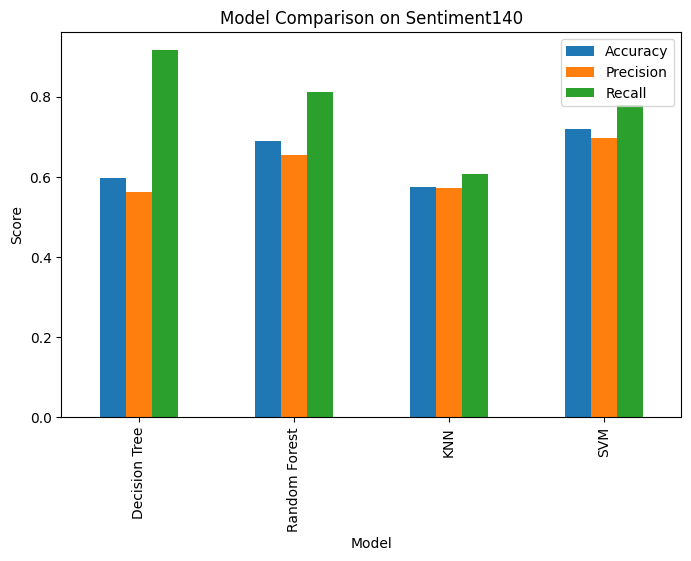

In [32]:
results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall'], kind='bar', figsize=(8,5))
plt.title('Model Comparison on Sentiment140')
plt.ylabel('Score')
plt.show()